In [1]:
#!/usr/bin/env python3

# This script takes a csv file for a set molecules with a SMILES column as input. OpenEye 
# functionalities are used to calculate XlogP

import pandas as pd
import numpy as np
from openeye import oechem, oedepict, oemolprop
import oenotebook as oenb
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Filtering by logP

In [2]:
###### IMPORT PKA FILTERED MOLECULE LIST FROM CSV FILE ######
df_pKa = pd.read_csv("df_pKa_interval_3-11_spread.csv")

df_XlogP = df_pKa.loc[:, ("eMolecules SKU", "canonical isomeric SMILES", "pKas in [3,11]")]


print("Initial number of molecules: ", df_XlogP.shape[0])
# df_XlogP.head()

# make new column for XlogP data 
df_XlogP["XlogP"] = None

for i, row in enumerate(df_XlogP.iterrows()):
    smiles = df_XlogP.loc[i,"canonical isomeric SMILES"]
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, str(smiles))
    
    try: 
        logP=oemolprop.OEGetXLogP(mol)
    except RuntimeError:
            print("Error: i=",i," ", df_molecules.ix[i, "NAME"])
            logP=float("NaN")
            
    df_XlogP.loc[i,"XlogP"] = float(logP)
    del mol
df_XlogP.head()

Initial number of molecules:  6


,eMolecules SKU,canonical isomeric SMILES,"pKas in [3,11]",XlogP
0,143204456,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685
1,133190549,c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4...,"[6.069, 8.134]",3.298
2,103864712,c1cc(cc(c1)Cl)Nc2c3c([nH]cn3)nc(n2)N,[4.231],1.395
3,153698825,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685
4,138902653,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685


In [3]:
##### ELIMINATE MOLECULES OUTSIDE ACCEPTABLE LOGP INTEVAL: -1 <= logP <= 6  #####

# Select molecules within desired logP interval
df_XlogP_interval = df_XlogP.loc[(-1 <= df_XlogP["XlogP"])]
df_XlogP_interval = df_XlogP_interval.loc[(df_XlogP_interval["XlogP"] <= 6)].reindex()

print("Number of molecules in logP interval: ", df_XlogP_interval.shape[0])

# Save dataframe of molecules that are withing XlogP interval criteria.
df_XlogP_interval.to_csv("df_XlogP_interval.csv")

df_XlogP_interval.head()

Number of molecules in logP interval:  6


,eMolecules SKU,canonical isomeric SMILES,"pKas in [3,11]",XlogP
0,143204456,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685
1,133190549,c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4...,"[6.069, 8.134]",3.298
2,103864712,c1cc(cc(c1)Cl)Nc2c3c([nH]cn3)nc(n2)N,[4.231],1.395
3,153698825,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685
4,138902653,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685


(0, 6)

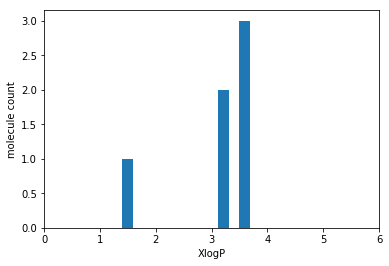

In [4]:
XlogP_values = df_XlogP_interval.loc[:, "XlogP"]
plt.hist(XlogP_values, bins=12)
plt.xlabel("XlogP")
plt.ylabel("molecule count")
plt.xlim(0,6)

## 2. Filtering by Molecular Weight

In [5]:
# Calculate molecular weight with OpenEye OEChem 
df_mw = df_XlogP_interval
df_mw["MolWt"]=None

for i, row in enumerate(df_mw.iterrows()):
    smiles = df_mw.loc[i,"canonical isomeric SMILES"]
    print(smiles)
    mol = oechem.OEGraphMol()
    print(mol)
    oechem.OESmilesToMol(mol, str(smiles))
    
    try: 
        mw = oechem.OECalculateMolecularWeight(mol)
    except RuntimeError:
        print("Error: i=",i," ", ddf_XlogP_interval.loc[i, "eMolecules SKU"])
        mw=float("NaN")
            
    df_mw.loc[i,"MolWt"] = float(mw)
    del mol
df_mw.head()

c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2
<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x11b0eaea0> >
c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4)CCO
<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x11b0eac30> >
c1cc(cc(c1)Cl)Nc2c3c([nH]cn3)nc(n2)N
<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x11b0ea030> >
c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2
<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x11b1b0180> >
c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2
<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x11b0ea060> >
c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4)CCO
<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x11b0ea150> >


,eMolecules SKU,canonical isomeric SMILES,"pKas in [3,11]",XlogP,MolWt
0,143204456,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334
1,133190549,c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4...,"[6.069, 8.134]",3.298,437.522
2,103864712,c1cc(cc(c1)Cl)Nc2c3c([nH]cn3)nc(n2)N,[4.231],1.395,260.682
3,153698825,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334
4,138902653,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334


In [6]:
# I will group compounds according to molecular weight into 2 groups.
# Fragment-like: 150<= mw <350
# Drug-like: 350< mw <=500

df_mw["group"] = None
for i, row in enumerate(df_mw.iterrows()):
    mw =df_mw.loc[i,"MolWt"]
    if (150 <= mw) and (mw < 350):
        df_mw.loc[i,"group"]= "fragment-like"
    elif (350 < mw) and (mw <= 500):
        df_mw.loc[i,"group"]= "drug-like"
    else:
        continue

df_mw.head()

,eMolecules SKU,canonical isomeric SMILES,"pKas in [3,11]",XlogP,MolWt,group
0,143204456,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like
1,133190549,c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4...,"[6.069, 8.134]",3.298,437.522,drug-like
2,103864712,c1cc(cc(c1)Cl)Nc2c3c([nH]cn3)nc(n2)N,[4.231],1.395,260.682,fragment-like
3,153698825,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like
4,138902653,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like


In [7]:
df_frag = df_mw.loc[df_mw["group"] == "fragment-like"]
print("Number of compounds suitable for fragment-like group: ", df_frag.shape[0])

df_drug = df_mw.loc[df_mw["group"] == "drug-like"]
print("Number of compounds suitable for drug-like group: ", df_drug.shape[0])

Number of compounds suitable for fragment-like group:  4
Number of compounds suitable for drug-like group:  2


(0, 20)

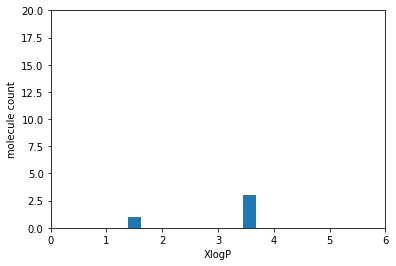

In [8]:
# Let's check the logP distribution of fragment-like group
XlogP_values = df_frag.loc[:, "XlogP"]
plt.hist(XlogP_values, bins=10)
plt.xlabel("XlogP")
plt.ylabel("molecule count")
plt.xlim(0,6)
plt.ylim(0,20)

(0, 20)

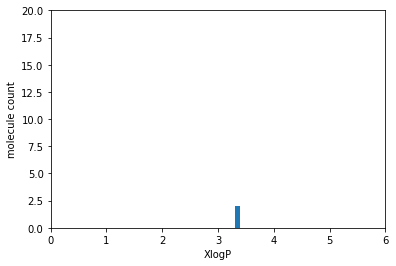

In [9]:
# Let's check the logP distribution of drug-like group
XlogP_values = df_drug.loc[:, "XlogP"]
plt.hist(XlogP_values, bins=10)
plt.xlabel("XlogP")
plt.ylabel("molecule count")
plt.xlim(0,6)
plt.ylim(0,20)

## 3. Filtering based on number of rotatable bonds

In [10]:
# Number of non-terminal rotatable bonds (excluding -OH)

df_mw["N_Rot"]=None

for i, row in enumerate(df_mw.iterrows()):
    smiles = df_mw.loc[i,"canonical isomeric SMILES"]
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, smiles)
    
    rotcounts = []
    nrots = oechem.OECount(mol, oechem.OEIsRotor())
    while nrots >= len(rotcounts):
        rotcounts.append(0)
    rotcounts[nrots] += 1
    
    del mol
    number_of_rotatable_bonds = len(rotcounts) - 1
    #print ("Max rotors:", number_of_rotatable_bonds)
    #print(df_mw.loc[i,"eMolecules ID"])
    
    df_mw.loc[i,"N_Rot"]= number_of_rotatable_bonds 

df_mw.head()

,eMolecules SKU,canonical isomeric SMILES,"pKas in [3,11]",XlogP,MolWt,group,N_Rot
0,143204456,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like,4
1,133190549,c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4...,"[6.069, 8.134]",3.298,437.522,drug-like,7
2,103864712,c1cc(cc(c1)Cl)Nc2c3c([nH]cn3)nc(n2)N,[4.231],1.395,260.682,fragment-like,2
3,153698825,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like,4
4,138902653,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like,4


In [11]:
# Number of rotatable bonds in fragment-like group shoud be <= 3
df_frag = df_mw.loc[df_mw["group"] == "fragment-like"]
df_frag_nrot_interval = df_frag.loc[df_frag["N_Rot"] <= 3]

print("Number of compounds suitable for fragment-like group: ", df_frag_nrot_interval.shape[0])

Number of compounds suitable for fragment-like group:  1


In [12]:
# Number of rotatable bonds in fragment-like group shoud be <= 8
df_drug = df_mw.loc[df_mw["group"] == "drug-like"]
df_drug_nrot_interval = df_drug.loc[df_drug["N_Rot"] <= 8]

print("Number of compounds suitable for drug-like group: ", df_drug_nrot_interval.shape[0])

Number of compounds suitable for drug-like group:  2


## 4. Filtering based on possible UV-chromophores

In [13]:
# For UV-metric pKa measurement UV chromophores absorbing in 200-400 nm are necessary.
# I will use presence of C=C-C=C, C=C-C=O or C=C-C=N  substructures as an indictato of UV-chromophore
# 1.3-butadiene absorbs at 217 nm

df_mw["N_UV_chrom"]=None

UV_chromophore_SMARTS = "[n,o,c][c,n,o]cc"

for i, row in enumerate(df_mw.iterrows()):

    # Count number UV absorbing conjugated-pi systems using SMARTS matching

    smiles = df_mw.loc[i,"canonical isomeric SMILES"]
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, str(smiles))

    #create a substructure search object
    queried_substructure = UV_chromophore_SMARTS
    ss = oechem.OESubSearch(queried_substructure)
    oechem.OEPrepareSearch(mol, ss)

    # loop over matches to count
    matched_ss_list=[]
    UV_chromophore_count = 0
    for index, match in enumerate(ss.Match(mol)):
        if ss.SingleMatch(mol) == True:
            matched_ss_list.append((index, match))
            UV_chromophore_count = len(matched_ss_list)
    
    df_mw.loc[i, "N_UV_chrom"] = UV_chromophore_count

df_mw.head()

,eMolecules SKU,canonical isomeric SMILES,"pKas in [3,11]",XlogP,MolWt,group,N_Rot,N_UV_chrom
0,143204456,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like,4,28
1,133190549,c1ccc2c(c1)N(c3cc(ccc3S2)C(F)(F)F)CCCN4CCN(CC4...,"[6.069, 8.134]",3.298,437.522,drug-like,7,24
2,103864712,c1cc(cc(c1)Cl)Nc2c3c([nH]cn3)nc(n2)N,[4.231],1.395,260.682,fragment-like,2,20
3,153698825,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like,4,28
4,138902653,c1ccc(cc1)CC(=O)Nc2nc3ccccc3s2,[9.045],3.685,268.334,fragment-like,4,28


In [14]:
df_frag = df_mw.loc[df_mw["group"] == "fragment-like"].reset_index(drop=True)
print("Number of compounds suitable for fragment-like group: ", df_frag.shape[0])

df_drug = df_mw.loc[df_mw["group"] == "drug-like"].reindex().reset_index(drop=True)
print("Number of compounds suitable for drug-like group: ", df_drug.shape[0])

# What is the minimum number of UV-chromophore matches in the drug-like and fragment-like group?
print("Minimum number of UV-chromophore units in fragment-like group: ", min(df_frag["N_UV_chrom"]) )
print("Minimum number of UV-chromophore units in drug-like group: ", min(df_drug["N_UV_chrom"]))

Number of compounds suitable for fragment-like group:  4
Number of compounds suitable for drug-like group:  2
Minimum number of UV-chromophore units in fragment-like group:  20
Minimum number of UV-chromophore units in drug-like group:  24


## 5. Select molecules for even coverage of logP dynamic range
### 5.1. Fragment-like group

In [16]:
#Establish dynamic range
XlogPs = np.array(df_frag["XlogP"])

minval = XlogPs.min()
maxval = XlogPs.max()

print("Dynamic range of XlogP is from %.2f to %.2f" % (minval, maxval))

#Let's make 10 bins and try drawing for 5 compounds per bin
nbins = 10
n_per_bin = 5 
bin_lefts = np.arange( minval, maxval, (maxval-minval)/float(nbins) )
bin_rights = np.array( [bin_lefts[i+1] for i in range(nbins-1)] + [maxval] )

print("Bin lefts: \n", bin_lefts)
print("Bin rights: \n", bin_rights)

range_ids = []

#Pick compounds
picked_ids=[]
df_frag["Selection"]=None

for bin_index in range(nbins):
    
    fnd_in_bin = 0
    
    for i, row in enumerate(df_frag.iterrows()):
        eMolecules_SKU = df_frag.loc[i,'eMolecules SKU'] #identifier
        XlogP = float(df_frag.loc[i,'XlogP'])
        
        if XlogP > bin_lefts[bin_index] and XlogP <= bin_rights[bin_index] and eMolecules_SKU not in picked_ids:
            range_ids.append( eMolecules_SKU )
            fnd_in_bin +=1
            
            df_frag.loc[i, "Selection"] = "picked"
            picked_ids.append(eMolecules_SKU)

        if fnd_in_bin==n_per_bin: break

    if fnd_in_bin < n_per_bin:
        print ("Can't find %s molecules in bin %s. Only %s molecule(s) found." % (n_per_bin, bin_index, fnd_in_bin) )


print("Found %s compounds spanning the dynamic range, out of %s desired. Current set size is %s." % (len(range_ids), nbins*n_per_bin, len(picked_ids)) )


Dynamic range of XlogP is from 1.40 to 3.69
Bin lefts: 
 [ 1.39500046  1.62400045  1.85300045  2.08200045  2.31100044  2.54000044
  2.76900043  2.99800043  3.22700043  3.45600042]
Bin rights: 
 [ 1.62400045  1.85300045  2.08200045  2.31100044  2.54000044  2.76900043
  2.99800043  3.22700043  3.45600042  3.68500042]
Can't find 5 molecules in bin 0. Only 0 molecule(s) found.
Can't find 5 molecules in bin 1. Only 0 molecule(s) found.
Can't find 5 molecules in bin 2. Only 0 molecule(s) found.
Can't find 5 molecules in bin 3. Only 0 molecule(s) found.
Can't find 5 molecules in bin 4. Only 0 molecule(s) found.
Can't find 5 molecules in bin 5. Only 0 molecule(s) found.
Can't find 5 molecules in bin 6. Only 0 molecule(s) found.
Can't find 5 molecules in bin 7. Only 0 molecule(s) found.
Can't find 5 molecules in bin 8. Only 0 molecule(s) found.
Can't find 5 molecules in bin 9. Only 3 molecule(s) found.
Found 3 compounds spanning the dynamic range, out of 50 desired. Current set size is 3.


(0, 20)

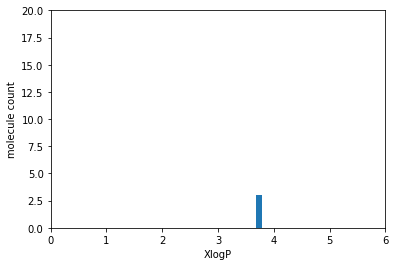

In [17]:
df_frag_picked = df_frag.loc[df_frag["Selection"]=="picked"]
df_frag_picked.to_csv("df_frag_picked.csv")

# Let's check the logP distribution of fragment-like group
XlogP_values = df_frag_picked.loc[:, "XlogP"]
plt.hist(XlogP_values, bins=10)
plt.xlabel("XlogP")
plt.ylabel("molecule count")
plt.xlim(0,6)
plt.ylim(0,20)

In [18]:
# Import database as eonb for visualization
frag_picked_smiles = df_frag_picked.loc[:,"canonical isomeric SMILES"].tolist()

file_name = "frag_picked.smi"
writer = open(file_name, "w")

for smiles in frag_picked_smiles:
    writer.write("%s\n" %smiles)

df_frag_picked_oenb = oenb.read_file_to_dataframe(filename="frag_picked.smi")
oenb.render_dataframe(df_frag_picked_oenb, width=300, height=300)

,Molecule


### 5.1. Drug-like group

In [20]:
#Establish dynamic range
XlogPs = np.array(df_drug["XlogP"])

minval = XlogPs.min()
maxval = XlogPs.max()

print("Dynamic range of XlogP is from %.2f to %.2f" % (minval, maxval))

#Let's make 10 bins and try drawing for 3 compounds per bin
nbins = 10
n_per_bin = 4
bin_lefts = np.arange( minval, maxval, (maxval-minval)/float(nbins) )
bin_rights = np.array( [bin_lefts[i+1] for i in range(nbins-1)] + [maxval] )

print("Bin lefts: \n", bin_lefts)
print("Bin rights: \n", bin_rights)

range_ids = []

#Pick compounds
picked_ids=[]
df_frag["Selection"]=None

for bin_index in range(nbins):
    
    fnd_in_bin = 0
    
    for i, row in enumerate(df_drug.iterrows()):
        eMolecules_SKU = df_drug.loc[i,'eMolecules SKU'] #identifier
        XlogP = float(df_drug.loc[i,'XlogP'])
        
        if XlogP > bin_lefts[bin_index] and XlogP <= bin_rights[bin_index] and eMolecules_ID not in picked_ids:
            range_ids.append( eMolecules_SKU )
            fnd_in_bin +=1
            
            df_drug.loc[i, "Selection"] = "picked"
            picked_ids.append(eMolecules_SKU)

        if fnd_in_bin==n_per_bin: break

    if fnd_in_bin < n_per_bin:
        print ("Can't find %s molecules in bin %s. Only %s molecule(s) found." % (n_per_bin, bin_index, fnd_in_bin) )


print("Found %s compounds spanning the dynamic range, out of %s desired. Current set size is %s." % (len(range_ids), nbins*n_per_bin, len(picked_ids)) )

Dynamic range of XlogP is from 3.30 to 3.30


ZeroDivisionError: float division by zero

(0, 20)

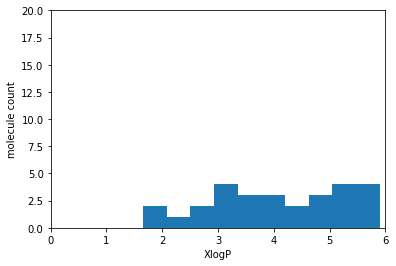

In [20]:
df_drug_picked = df_drug.loc[df_drug["Selection"]=="picked"]
df_drug_picked.to_csv("df_drug_picked.csv")

# Let's check the logP distribution of fragment-like group
XlogP_values = df_drug_picked.loc[:, "XlogP"]
plt.hist(XlogP_values, bins=10)
plt.xlabel("XlogP")
plt.ylabel("molecule count")
plt.xlim(0,6)
plt.ylim(0,20)

In [21]:
# Import database as eonb for visualization
drug_picked_smiles = df_drug_picked.loc[:,"canonical isomeric SMILES"].tolist()

file_name = "drug_picked.smi"
writer = open(file_name, "w")

for smiles in drug_picked_smiles:
    writer.write("%s\n" %smiles)

df_drug_picked_oenb = oenb.read_file_to_dataframe(filename="drug_picked.smi")
oenb.render_dataframe(df_drug_picked_oenb, width=300, height=300)

,Molecule
